In [2]:
import sys
import pandas as pd
from nltk import FreqDist, tokenize, ngrams
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import geopandas as gpd

lib_dir = "../../libs/"
if lib_dir not in sys.path:
    sys.path.append(lib_dir)
    
import DSF_helpers

In [4]:
PATH_FILE = '../../data/ap_tweets_v2.pkl'

In [5]:
tweets = pd.read_pickle(PATH_FILE)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584670 entries, 1 to 651062
Data columns (total 33 columns):
tweet_id                 584670 non-null int64
created_at               584670 non-null object
entities_hashtags        584670 non-null object
entities_mentions        584670 non-null object
place_bounding_box       584639 non-null object
country                  584639 non-null object
place_country_code       584639 non-null object
place_full_name          584639 non-null object
place_id                 584639 non-null object
place_name               584639 non-null object
place_place_type         584639 non-null object
place_url                584639 non-null object
favorite_count           584670 non-null int64
geo_coordinates          7091 non-null object
geo_type                 7091 non-null object
text                     584670 non-null object
lang                     584670 non-null object
retweet_count            584670 non-null int64
retweeted                584670 

## Word cloud of most common unigrams

In [6]:
text = tweets['text'].str.lower().str.cat(sep=' ')
wordcloud = WordCloud().generate(text)

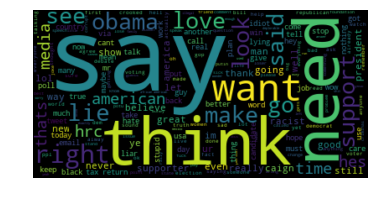

In [7]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequencies (Unigrams)

In [8]:
words = tokenize.word_tokenize(text)
word_dist = FreqDist(words)

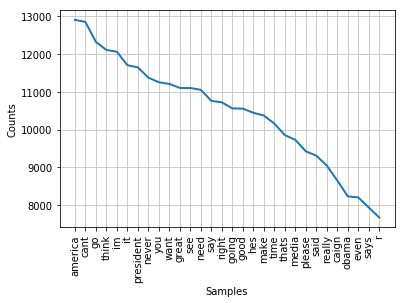

In [9]:
word_dist.plot(30, cumulative = False)

## Word Frequencies (Bigrams)

In [10]:
bigrams = ngrams(words, 2)

In [11]:
bigrams_dist = FreqDist(bigrams)
values = bigrams_dist.values()
count = sum(values)
print(count)

3763986


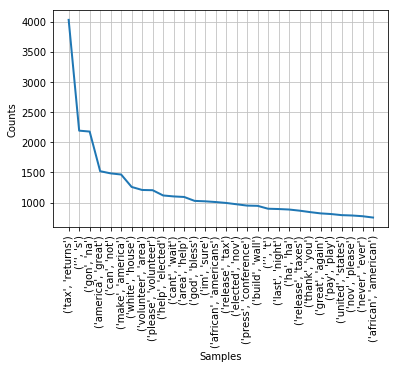

In [12]:
bigrams_dist.plot(30, cumulative = False)

## Stemming
Stemming done using the Porter Stemmer

In [13]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

## Stemmed Word Frequencies (Unigrams)

In [14]:
word_dist = FreqDist(stemmed_words)
values = bigrams_dist.values()
count = sum(values)
print(count)

3763986


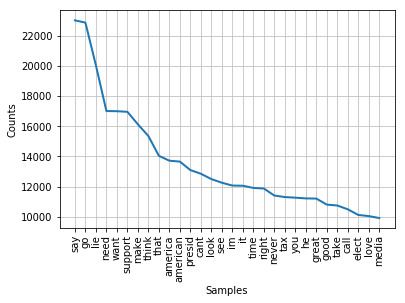

In [15]:
word_dist.plot(30, cumulative = False)

## Stemmed Word Frequencies (Bigrams)

In [16]:
bigrams = ngrams(stemmed_words, 2)
bigrams_dist = FreqDist(bigrams)
count = sum(bigrams_dist.values())
print(count)

3763986


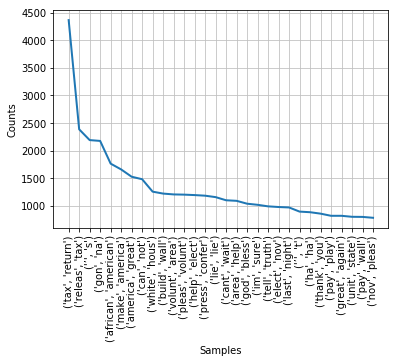

In [17]:
bigrams_dist.plot(30)

## Lemmatize

In [18]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

## Lemmatized Word Frequencies

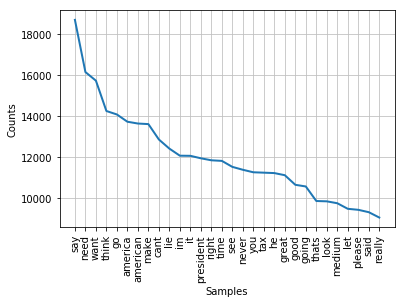

In [19]:
word_dist = FreqDist(lemmatized_words)
word_dist.plot(30, cumulative = False)

## Lemmatized Word Frequencies (Bigrams)

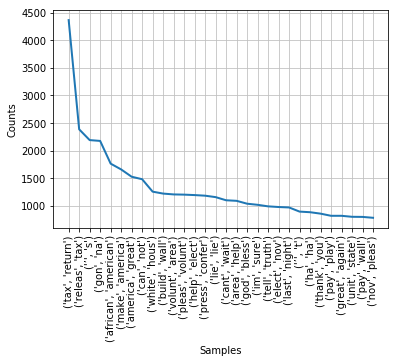

In [20]:
bigrams = ngrams(stemmed_words, 2)
bigrams_dist = FreqDist(bigrams)
bigrams_dist.plot(30)

## Most Common Features per State

In [21]:
# Only look for USA tweets
logic = (tweets.country == "United States") & \
        (tweets.place_place_type != "poi") & \
        (tweets.place_place_type != "country") & \
        (tweets.place_place_type != "neighborhood")

tweets_USA = tweets[logic]
tweets_USA["state_abrv"] = tweets_USA.place_full_name.apply(DSF_helpers.get_state_ABRV)

could not find:  Camarones, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  Caguas, Puerto Rico
could not find:  Caguas, Puerto Rico
could not find:  Caguas, Puerto Rico
could not find:  Guayama, Puerto Rico
could not find:  Trujillo Alto, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Guayama, Puerto Rico
could not find:  Guaynabo, Puerto Rico
could not find:  Cañaboncito, Puerto Rico
could not find:  Frederiksted, Virgin Islands
could not find:  Mayagüez, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Caguas, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  Pueblo 

/Users/jimichailidis/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
text_per_state = tweets_USA[["state_abrv", "text"]].groupby("state_abrv")["text"].apply(lambda x: "%s" % ' '.join(x))
text_per_state = pd.DataFrame(text_per_state)
text_per_state = text_per_state.rename(columns={"state":"text"}).reset_index()

In [23]:
text_per_state["tokens"] = text_per_state.text.apply(tokenize.word_tokenize)
text_per_state["word_dist"] = text_per_state.tokens.apply(FreqDist)
text_per_state.head()

,state_abrv,text,tokens,word_dist
0,AK,time boycott socialist news network cnn sad st...,"[time, boycott, socialist, news, network, cnn,...","{'considered': 1, 'andgo': 1, 'outnumber': 1, ..."
1,AL,tax returns refuses show voters mysterious dea...,"[tax, returns, refuses, show, voters, mysterio...","{'presented': 1, 'manafortyea': 1, 'gopers': 2..."
2,AR,comment seems immature sexist stopwpnssales fi...,"[comment, seems, immature, sexist, stopwpnssal...","{'unconstitution': 1, 'left': 13, 'bush': 8, '..."
3,AZ,videotape enough expose well lemon jobwith big...,"[videotape, enough, expose, well, lemon, jobwi...","{'railroad': 1, 'presented': 2, 'bitchboy': 1,..."
4,"Arecibo, Puerto Rico",hopefully supporters ticket threats obstructed...,"[hopefully, supporters, ticket, threats, obstr...","{'jewish': 1, 'probed': 1, 'supporters': 1, 'c..."


In [24]:
def get_most_common_words(wordfreq):
    words = ' ' 
    for word, freq in wordfreq.most_common(5):
         words = words + word + " "
    return words

In [25]:
text_per_state["most_common"] = text_per_state.word_dist.apply(get_most_common_words)
text_per_state.head()

,state_abrv,text,tokens,word_dist,most_common
0,AK,time boycott socialist news network cnn sad st...,"[time, boycott, socialist, news, network, cnn,...","{'considered': 1, 'andgo': 1, 'outnumber': 1, ...",good hes racist president liar
1,AL,tax returns refuses show voters mysterious dea...,"[tax, returns, refuses, show, voters, mysterio...","{'presented': 1, 'manafortyea': 1, 'gopers': 2...",via obama america muslim see
2,AR,comment seems immature sexist stopwpnssales fi...,"[comment, seems, immature, sexist, stopwpnssal...","{'unconstitution': 1, 'left': 13, 'bush': 8, '...",it cant im america go
3,AZ,videotape enough expose well lemon jobwith big...,"[videotape, enough, expose, well, lemon, jobwi...","{'railroad': 1, 'presented': 2, 'bitchboy': 1,...",hrc go never cant right
4,"Arecibo, Puerto Rico",hopefully supporters ticket threats obstructed...,"[hopefully, supporters, ticket, threats, obstr...","{'jewish': 1, 'probed': 1, 'supporters': 1, 'c...",hes going says were cant


In [26]:
states = gpd.read_file('../../data/states_21basic/states.shp')
states = states.merge(text_per_state, how = 'inner', left_on = 'STATE_ABBR', right_on = 'state_abrv').drop(columns=['state_abrv'])

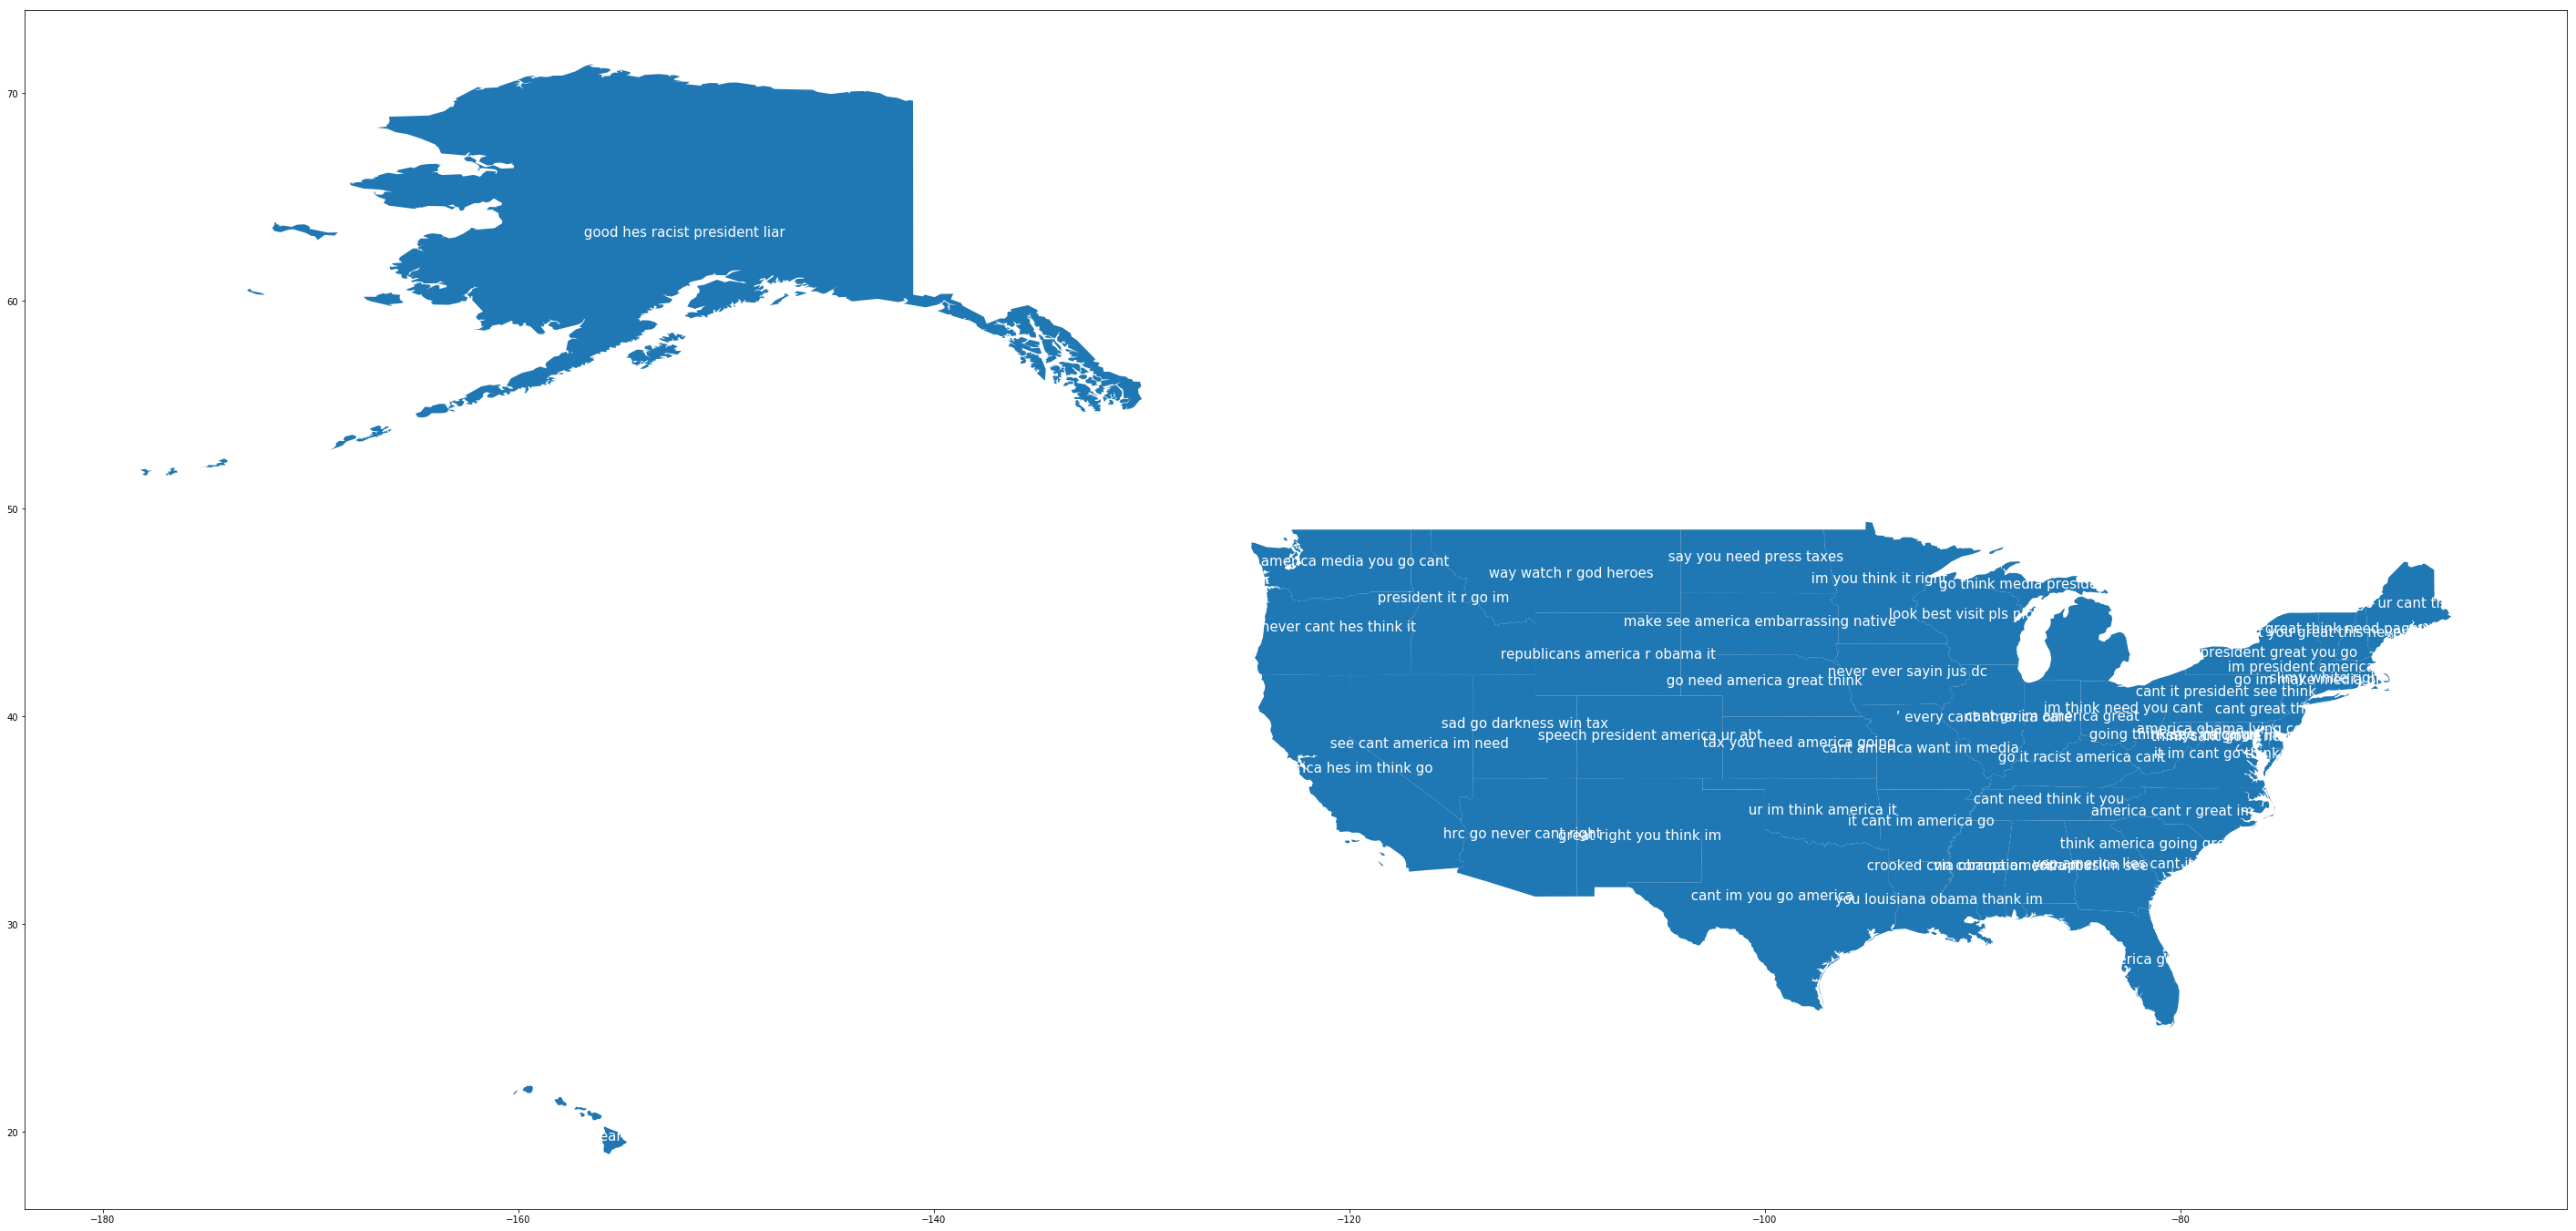

In [27]:
states['rep_point'] = states['geometry'].apply(lambda x: x.representative_point().coords[:])
states['rep_point'] = [coords[0] for coords in states['rep_point']]

states.plot(figsize=(50, 50))
for idx, row in states.iterrows():
    plt.annotate(s=row['most_common'], xy=row['rep_point'], horizontalalignment='center', fontsize = 15, color = 'white')